In [64]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [65]:
import pandas.io.data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader('F', 'google', start, end)
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855796
2010-01-05,10.45,11.24,10.40,10.96,215620138
2010-01-06,11.21,11.46,11.13,11.37,200070554
2010-01-07,11.46,11.69,11.32,11.66,130201626
2010-01-08,11.67,11.74,11.46,11.69,130462912


### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

### Plot the high and low values of Yahoo's stock for July and August 2012

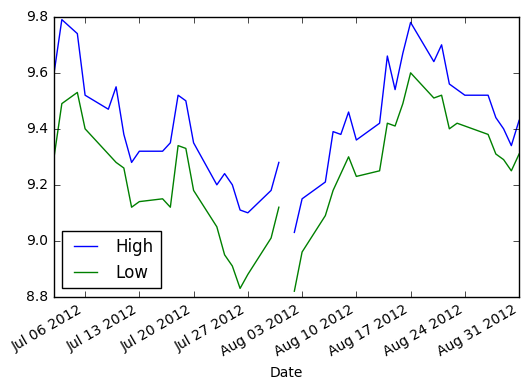

In [66]:
# %load snippets/prac1.py
f['2012-07':'2012-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

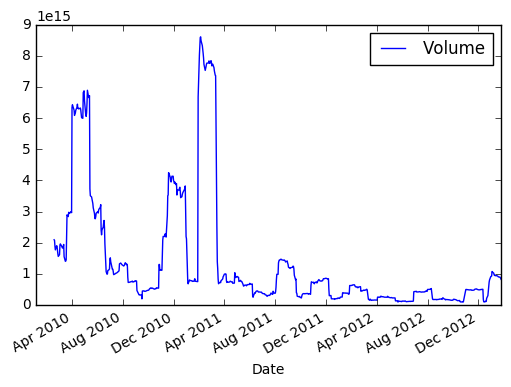

In [67]:
# %load snippets/prac2.py
r = f[['Volume']].rolling(30)
r.var().plot()

### Is the expanding window variance of the trading volume relatively stable over time?

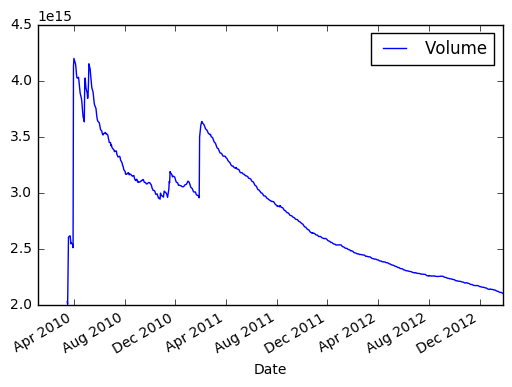

In [68]:
# %load snippets/prac3.py
# %load snippets/prac2.py
r = f[['Volume']].expanding(50)
r.var().plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [69]:
# %load snippets/prac4.py

len(f[f.Close>f.Open])

350

### And did the 'up' days become more or less frequent over time?

In [72]:
# %load snippets/prac5.py
f['day_gain'] = f.Close - f.Open

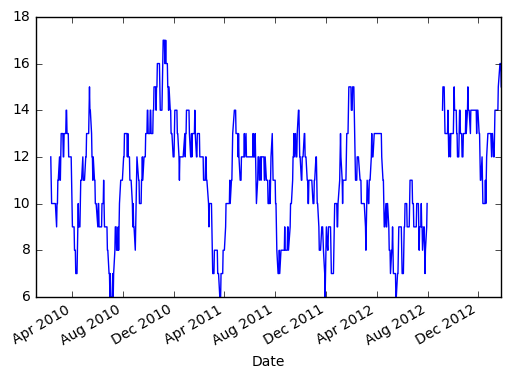

In [75]:
rup = f.rolling(window=25)['day_gain']
rup.apply(lambda x: len([x_i for x_i in x if x_i > 0])).plot()

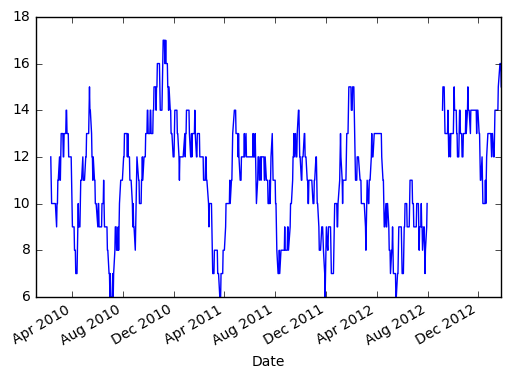

In [84]:
f.rolling(window = 25)['day_gain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])).plot()

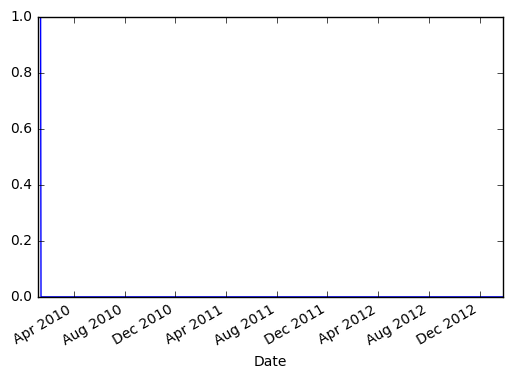

In [59]:
# %load snippets/prac5.py
rup = f.expanding(3)['day_gain']
rup.apply(lambda x: len([x_i for x_i in x if x_i > 0]).plot()

### Compute and plot the mean monthly High value of the stock

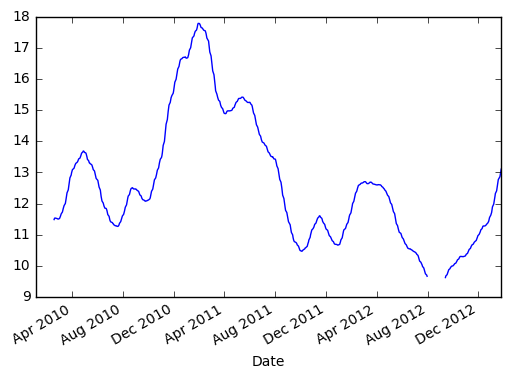

In [86]:
# %load snippets/prac6.py
f.rolling(window=30)['High'].mean().plot()

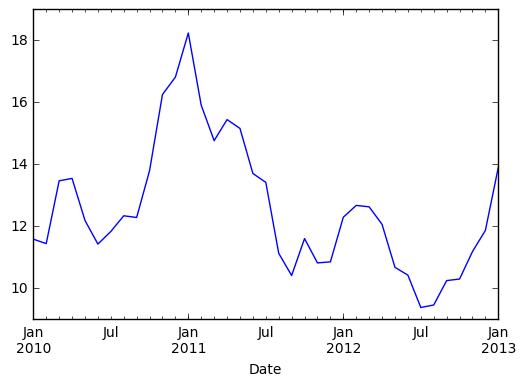

In [87]:
f.resample('M').mean()['High'].plot()

### Explore the variance of the differenced volume

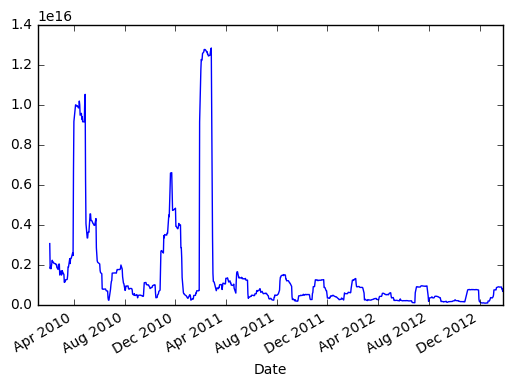

In [91]:
# %load snippets/prac7.py
r = f['Volume'].rolling(window=2).apply(lambda x : x[1] - x[0])
r.rolling(20).var().plot()

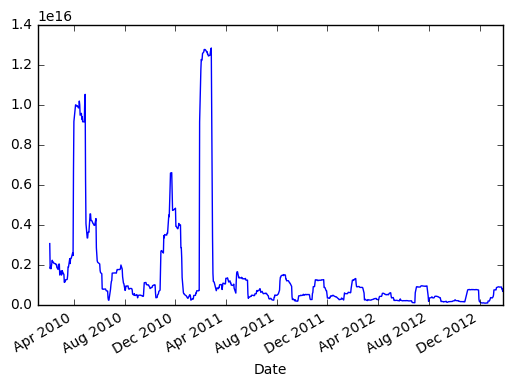

In [92]:
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window = 20).var().plot()

### Does the lagged time series correlate with itself?

In [93]:
# %load snippets/prac8.py
# What's the best predictor of tomorrow's stock price?
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.649776
real,0.649776,1.000000
